In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
        
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list
for i in range (len(cities)):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | punta arenas
Processing Record 2 of Set 13 | isangel
Processing Record 3 of Set 13 | colares
Processing Record 4 of Set 13 | amderma
City not found. Skipping...
Processing Record 5 of Set 13 | jamestown
Processing Record 6 of Set 13 | arraial do cabo
Processing Record 7 of Set 13 | vaini
Processing Record 8 of Set 13 | ushuaia
Processing Record 9 of Set 13 | ambulu
Processing Record 10 of Set 13 | kodiak
Processing Record 11 of Set 13 | barrow
Processing Record 12 of Set 13 | touros
Processing Record 13 of Set 13 | albany
Processing Record 14 of Set 13 | paamiut
Processing Record 15 of Set 13 | vila velha
Processing Record 16 of Set 13 | san quintin
Processing Record 17 of Set 13 | weinan
Processing Record 18 of Set 13 | mitu
Processing Record 19 of Set 13 | baculin
Processing Record 20 of Set 13 | nikolskoye
Processing Record 21 of Set 13 | rikitea
Processing Record 22 of Set 13 | havelock
Processing Record 23 of Set 13 | pipar
Processing Record 24 of S

Processing Record 35 of Set 16 | korla
Processing Record 36 of Set 16 | balkhash
Processing Record 37 of Set 16 | viking
Processing Record 38 of Set 16 | cayenne
Processing Record 39 of Set 16 | fairbanks
Processing Record 40 of Set 16 | moree
Processing Record 41 of Set 16 | kindu
Processing Record 42 of Set 16 | nova zagora
Processing Record 43 of Set 16 | vicuna
Processing Record 44 of Set 16 | bayan
Processing Record 45 of Set 16 | san cristobal
Processing Record 46 of Set 16 | asau
Processing Record 47 of Set 16 | canroma
Processing Record 48 of Set 16 | ponta do sol
Processing Record 49 of Set 16 | vaitape
Processing Record 50 of Set 16 | hami
Processing Record 1 of Set 17 | nioro
Processing Record 2 of Set 17 | pangnirtung
Processing Record 3 of Set 17 | sur
Processing Record 4 of Set 17 | constitucion
Processing Record 5 of Set 17 | tasiilaq
Processing Record 6 of Set 17 | cidreira
Processing Record 7 of Set 17 | hirara
Processing Record 8 of Set 17 | san policarpo
Processing R

Processing Record 24 of Set 20 | praya
Processing Record 25 of Set 20 | bara
Processing Record 26 of Set 20 | deputatskiy
Processing Record 27 of Set 20 | kosa
Processing Record 28 of Set 20 | pingliang
Processing Record 29 of Set 20 | manta
Processing Record 30 of Set 20 | barrhead
Processing Record 31 of Set 20 | manturovo
Processing Record 32 of Set 20 | tessalit
Processing Record 33 of Set 20 | marsh harbour
Processing Record 34 of Set 20 | karratha
Processing Record 35 of Set 20 | avera
Processing Record 36 of Set 20 | batagay-alyta
Processing Record 37 of Set 20 | samusu
City not found. Skipping...
Processing Record 38 of Set 20 | dikson
Processing Record 39 of Set 20 | berlevag
Processing Record 40 of Set 20 | sayyan
Processing Record 41 of Set 20 | valenca
Processing Record 42 of Set 20 | zhuzhou
Processing Record 43 of Set 20 | gidam
Processing Record 44 of Set 20 | upernavik
Processing Record 45 of Set 20 | ilulissat
Processing Record 46 of Set 20 | nouadhibou
Processing Reco

Processing Record 9 of Set 24 | lahij
Processing Record 10 of Set 24 | menongue
Processing Record 11 of Set 24 | burica
City not found. Skipping...
Processing Record 12 of Set 24 | pierre
Processing Record 13 of Set 24 | formosa
Processing Record 14 of Set 24 | eldorado
Processing Record 15 of Set 24 | port blair
Processing Record 16 of Set 24 | sambalpur
Processing Record 17 of Set 24 | batticaloa
Processing Record 18 of Set 24 | surt
Processing Record 19 of Set 24 | kushmurun
Processing Record 20 of Set 24 | colesberg
Processing Record 21 of Set 24 | kiomboi
Processing Record 22 of Set 24 | svetlyy yar
Processing Record 23 of Set 24 | kaabong
Processing Record 24 of Set 24 | la paz
Processing Record 25 of Set 24 | vestbygda
City not found. Skipping...
Processing Record 26 of Set 24 | minot
Processing Record 27 of Set 24 | viedma
Processing Record 28 of Set 24 | sandusky
Processing Record 29 of Set 24 | toftir
City not found. Skipping...
Processing Record 30 of Set 24 | petatlan
Proce

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,48.20,45,40,12.75,CL,2020-10-27 16:52:14
1,Isangel,-19.55,169.27,74.03,82,30,13.69,VU,2020-10-27 16:52:15
2,Colares,38.80,-9.45,63.00,77,75,8.05,PT,2020-10-27 16:52:15
3,Jamestown,42.10,-79.24,46.00,87,90,5.82,US,2020-10-27 16:47:32
4,Arraial Do Cabo,-22.97,-42.03,82.40,65,0,12.75,BR,2020-10-27 16:52:15
5,Vaini,-21.20,-175.20,71.60,88,40,9.17,TO,2020-10-27 16:52:15
6,Ushuaia,-54.80,-68.30,44.60,48,40,19.46,AR,2020-10-27 16:52:15
7,Ambulu,-8.35,113.61,76.42,88,94,1.21,ID,2020-10-27 16:52:16
8,Kodiak,57.79,-152.41,42.80,60,1,9.17,US,2020-10-27 16:52:16
9,Barrow,71.29,-156.79,28.40,79,75,10.29,US,2020-10-27 16:52:16


In [13]:
columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-10-27 16:52:14,-53.15,-70.92,48.20,45,40,12.75
1,Isangel,VU,2020-10-27 16:52:15,-19.55,169.27,74.03,82,30,13.69
2,Colares,PT,2020-10-27 16:52:15,38.80,-9.45,63.00,77,75,8.05
3,Jamestown,US,2020-10-27 16:47:32,42.10,-79.24,46.00,87,90,5.82
4,Arraial Do Cabo,BR,2020-10-27 16:52:15,-22.97,-42.03,82.40,65,0,12.75
5,Vaini,TO,2020-10-27 16:52:15,-21.20,-175.20,71.60,88,40,9.17
6,Ushuaia,AR,2020-10-27 16:52:15,-54.80,-68.30,44.60,48,40,19.46
7,Ambulu,ID,2020-10-27 16:52:16,-8.35,113.61,76.42,88,94,1.21
8,Kodiak,US,2020-10-27 16:52:16,57.79,-152.41,42.80,60,1,9.17
9,Barrow,US,2020-10-27 16:52:16,71.29,-156.79,28.40,79,75,10.29


In [14]:
# Create a new output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export city data into a csv
city_data_df.to_csv(output_data_file, index_label='City ID')

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [18]:
import time

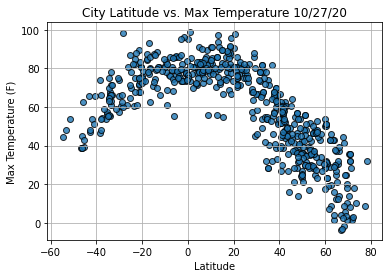

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

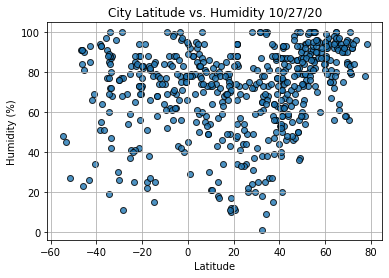

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

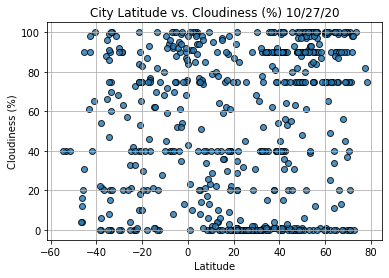

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

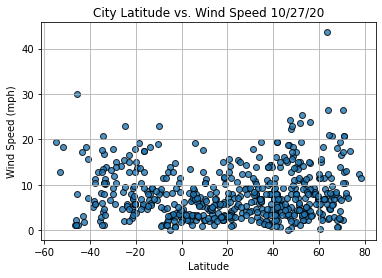

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()